**Handwritten Digit Recognition Using MNIST Dataset**

Group Members:
*  Aditya Parekh
*  Karina Ponze



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


The Dataset

In [ ]:
#step 1: Importing the required library
import tensorflow.keras as keras
from keras.datasets import mnist
#Step 2: retrieving the dataset we chose from the keras library
mnist = keras.datasets.mnist
#Step 3: loading the dataset into training and testing sets
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Step 4: inspect the data types and shape
print(f"X_Train dtype: {X_train.dtype}    |    X_train shape: {X_train.shape}")
print(f"y_Train dtype: {y_train.dtype}    |    y_train shape: {y_train.shape}")
print(f"X_test dtype:  {X_test.dtype}    |    X_test.shape:  {X_test.shape}")
print(f"y_test dtype:  {y_test.dtype}    |    y_test shape:  {y_test.shape}")

X_Train dtype: uint8    |    X_train shape: (60000, 28, 28)
y_Train dtype: uint8    |    y_train shape: (60000,)
X_test dtype:  uint8    |    X_test.shape:  (10000, 28, 28)
y_test dtype:  uint8    |    y_test shape:  (10000,)


In [ ]:
#for the sake of getting stats on our data through a dataframe:

#Step 4: Convert to dataframe

#resize to 1d array to turn to df
x_train = X_train.reshape(X_train.shape[0], -1)
x_test = X_test.reshape(X_test.shape[0], -1)

#convert to df
df_train = pd.DataFrame(x_train)
df_train['label'] = y_train

df_test = pd.DataFrame(x_test)
df_test['label'] = y_test

df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [ ]:
#if we dont wanna use the heatmap, we could use this function
import math
# Function to visualize the data
def plot_imgs(images, labels=None):
    subplots_x = int(math.ceil(len(images) / 5))
    plt.figure(figsize=(10,2*subplots_x))
    for i in range(min(len(images), subplots_x*5)):
        plt.subplot(subplots_x,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        if labels is not None:
            plt.xlabel(labels[i])
    plt.show()


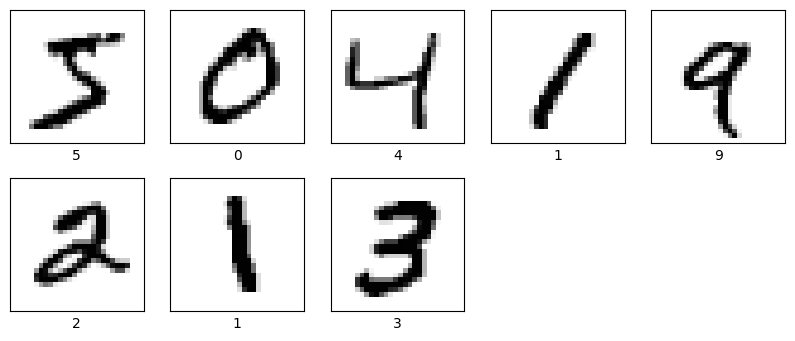

In [ ]:
plot_imgs(X_train[:8], y_train[:8])

In [ ]:
wai# Logistic Regression

# Normalizing dataset
df_train.iloc[:, :-1] = df_train.iloc[:, :-1] / 255
df_test.iloc[:, :-1] = df_test.iloc[:, :-1] / 255

# Importing the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Splitting the dataset into training and testing
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

# Training and testing the model
log_reg = LogisticRegression(max_iter=1000, solver='saga', multi_class='multinomial', verbose=1)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

# Printing accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Streaming output truncated to the last 5000 lines.
9996    0.000000
9997    0.000000
9998    0.000000
9999    0.850980
Name: 399, Length: 10000, dtype: float64' has dtype incompatible with uint8, please explicitly cast to a compatible dtype first.
  df_test.iloc[:, :-1] = df_test.iloc[:, :-1] / 255
<ipython-input-9-51fcdb25bed0>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0.000000
1       0.000000
2       0.000000
3       0.992157
4       0.643137
          ...   
9995    0.000000
9996    0.000000
9997    0.482353
9998    0.000000
9999    0.992157
Name: 400, Length: 10000, dtype: float64' has dtype incompatible with uint8, please explicitly cast to a compatible dtype first.
  df_test.iloc[:, :-1] = df_test.iloc[:, :-1] / 255
<ipython-input-9-51fcdb25bed0>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0.000000
1       0.0

convergence after 510 epochs took 1142 seconds
Accuracy: 0.9257


In [ ]:
# Printing accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9257


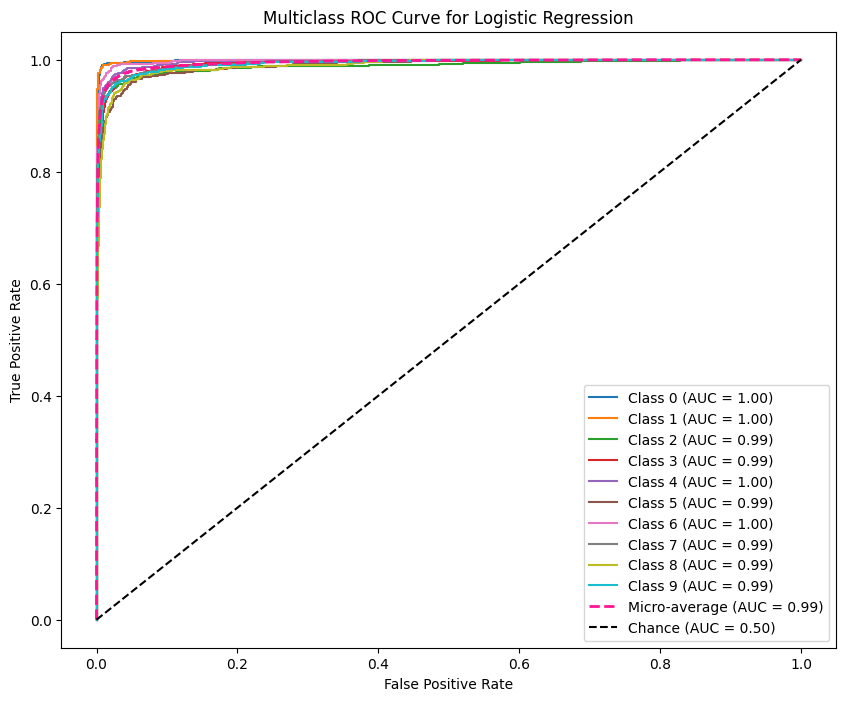

In [ ]:
#ROC CURVE FOR Logistic Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

# Binarize the output (required for multiclass ROC)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Predict probabilities for each class
y_score = log_reg.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(
        fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})"
    )

# Plot micro-average ROC curve
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"Micro-average (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle="--",
    linewidth=2,
)

# Random classifier line
plt.plot([0, 1], [0, 1], "k--", label="Chance (AUC = 0.50)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.show()


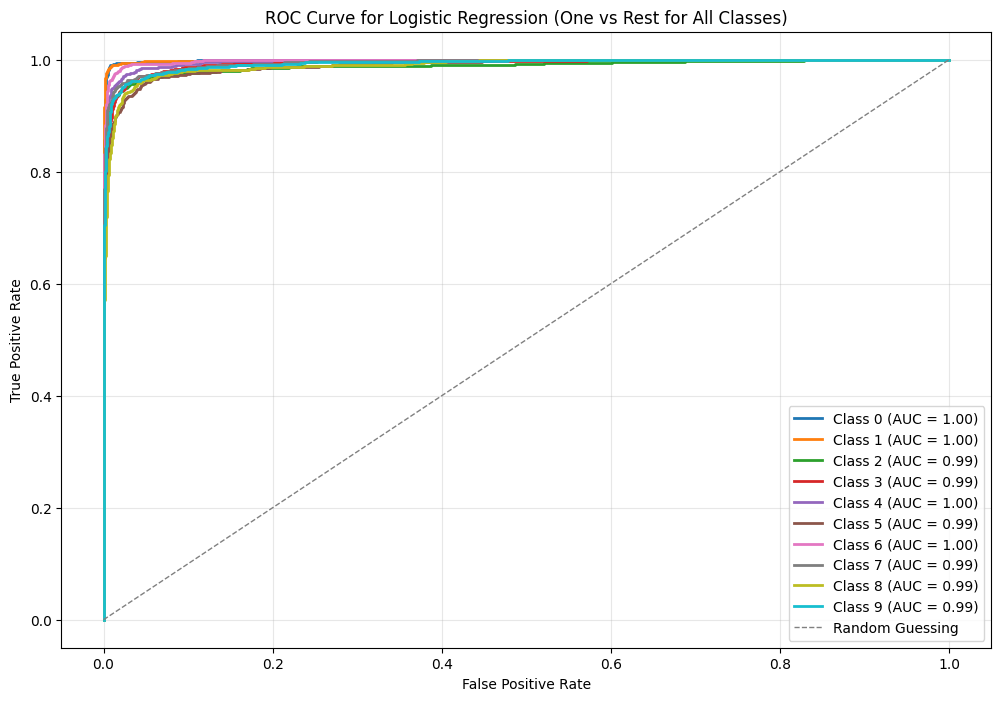

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multiclass comparison
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Predict probabilities for each class using Logistic Regression
y_score = log_reg.predict_proba(X_test)

# Initialize plot
plt.figure(figsize=(12, 8))

# Loop through all classes and compute ROC curves for each
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {i} (AUC = {roc_auc:.2f})")

# Plot random guessing line (diagonal)
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=1, label="Random Guessing")

# Format the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression (One vs Rest for All Classes)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


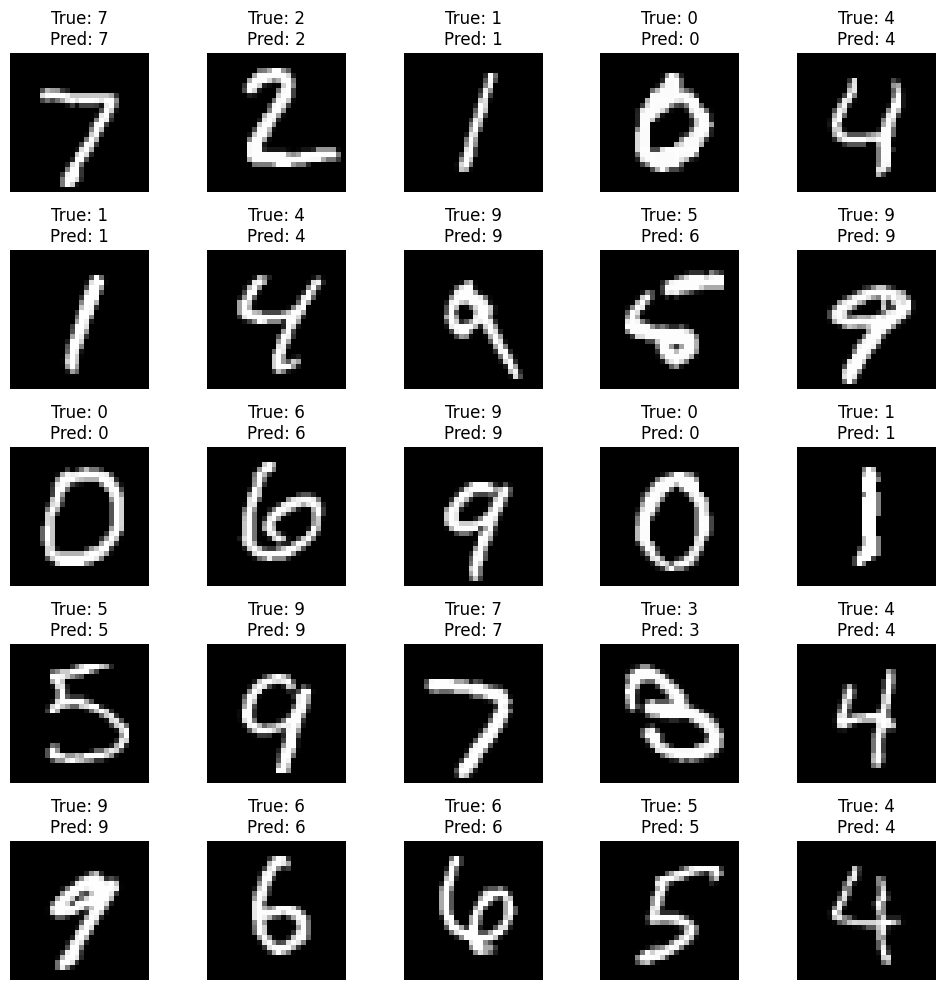

In [ ]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_imgsLR(images, true_labels, predicted_labels):
    """
    Plots images with their true and predicted labels.

    Args:
    images: Array of image data to visualize.
    true_labels: True labels for comparison.
    predicted_labels: Model's predicted labels for comparison.
    """
    # Convert images to NumPy arrays if they aren't already
    images = np.array(images)

    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28, 28), cmap='gray')  # Reshape for MNIST 28x28 images
        ax.set_title(f'True: {true_labels.iloc[i]}\nPred: {predicted_labels[i]}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize the first 25 predictions with true vs predicted labels
plot_imgsLR(X_test[0:25], y_test[0:25], y_pred[0:25])

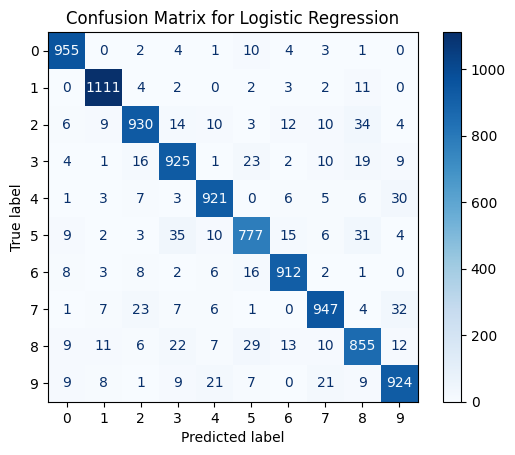

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

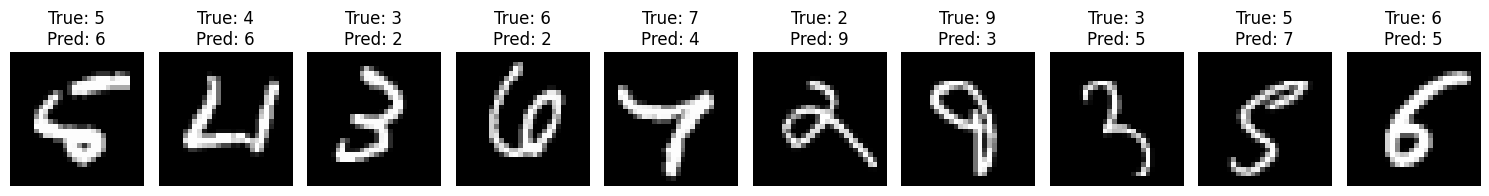

In [ ]:
#misclassified examples for logistic regression
# Identify misclassified examples
misclassified_idx = np.where(y_test != y_pred)[0]

# Select a subset to display
num_examples = 10  # Adjust as needed
misclassified_samples = misclassified_idx[:num_examples]

# Plot the misclassified examples
plt.figure(figsize=(15, 5))
for i, idx in enumerate(misclassified_samples):
    plt.subplot(1, num_examples, i + 1)
    plt.imshow(X_test.iloc[idx].values.reshape(28, 28), cmap='gray')  # Reshape 28x28
    plt.title(f"True: {y_test.iloc[idx]}\nPred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# CNN

import time
from sklearn.metrics import precision_score, recall_score

# Initialize a sequential model
cnn_model = keras.Sequential()

# Reshape the training and testing data to include a single channel (grayscale images)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Add an input layer to the model with the shape of the input images
input_layer = keras.layers.InputLayer(input_shape=(X_train.shape[1:]))
cnn_model.add(input_layer)

# Add the first convolutional layer, followed by batch normalization and ReLU activation
conv_1 = keras.layers.Conv2D(filters=16, kernel_size=3)
batch_norm1 = keras.layers.BatchNormalization()
ReLU_1= keras.layers.ReLU()
cnn_model.add(conv_1)
cnn_model.add(batch_norm1)
cnn_model.add(ReLU_1)

# Add the second convolutional layer
conv_2 = keras.layers.Conv2D(filters=32, kernel_size = 3)
batch_norm2 = keras.layers.BatchNormalization()
ReLU_2= keras.layers.ReLU()
cnn_model.add(conv_2)
cnn_model.add(batch_norm2)
cnn_model.add(ReLU_2)

# Add the third convolutional layer
conv_3 = keras.layers.Conv2D(filters=64, kernel_size = 3)
batch_norm3 = keras.layers.BatchNormalization()
ReLU_3= keras.layers.ReLU()
cnn_model.add(conv_3)
cnn_model.add(batch_norm3)
cnn_model.add(ReLU_3)

# Add the fourth convolutional layer
conv_4 = keras.layers.Conv2D(filters=128, kernel_size = 3)
batch_norm4 = keras.layers.BatchNormalization()
ReLU_4= keras.layers.ReLU()
cnn_model.add(conv_4)
cnn_model.add(batch_norm4)
cnn_model.add(ReLU_4)

# Add a global average pooling layer to reduce the feature map to a single value per channel
pooling_layer= keras.layers.GlobalAveragePooling2D()
cnn_model.add(pooling_layer)

# Add a dense output layer with 10 units for 10 classes (assumes classification task)
output_layer = keras.layers.Dense(units=10)

# Print a summary of the model architecture
cnn_model.summary()

# Compile the model with Stochastic Gradient Descent (SGD) optimizer and sparse categorical cross-entropy loss
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

cnn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

# Model training
num_epochs = 10
t0 = time.time()
history = cnn_model.fit(X_train, y_train, epochs= num_epochs)
t1 = time.time()
print('Elapsed time: %.2fs' % (t1-t0))

# Evaluate the model on the test dataset
loss, accuracy =cnn_model.evaluate(X_test, y_test)
print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

# Predict the labels for the test dataset
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')

print(f'Precision: {precision}, Recall: {recall}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 22, 22, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 20, 20, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,112 (383.25 KB)

 Trainable params: 97,632 (381.38 KB)

 Non-trainable params: 480 (1.88 KB)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 518s 275ms/step - accuracy: 0.7132 - loss: 1.9933
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 491s 262ms/step - accuracy: 0.9618 - loss: 0.2245
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 503s 262ms/step - accuracy: 0.9694 - loss: 0.1572
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 504s 263ms/step - accuracy: 0.9762 - loss: 0.1244
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 520s 277ms/step - accuracy: 0.9769 - loss: 0.1111
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 579s 286ms/step - accuracy: 0.9788 - loss: 0.0988
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 525s 267ms/step - accuracy: 0.9807 - loss: 0.0926
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 501s 266ms/step - accuracy: 0.9819 - loss: 0.0840
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 498s 266ms/step - accuracy: 0.9828 - loss: 0.0798
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 513s 272ms/step - accuracy: 0.9836 - loss: 0.0745
Elapsed time: 5204.89s
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0

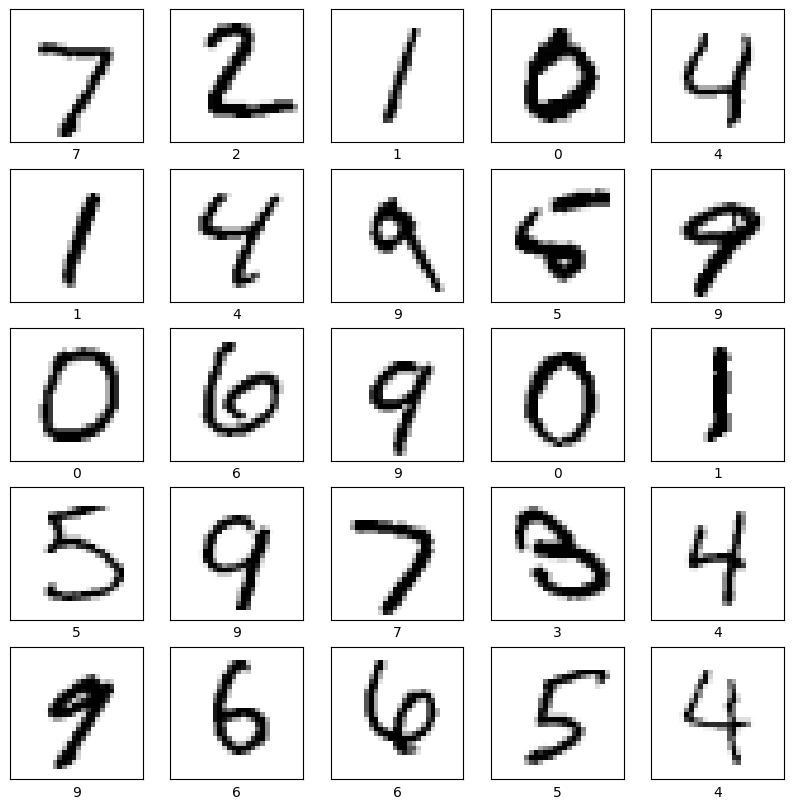

In [ ]:
# PLOTTING THE FIRST 25 PREDICTIONS OF THE TEST SET
plot_imgs(X_test[0:25], y_pred_classes[0:25])

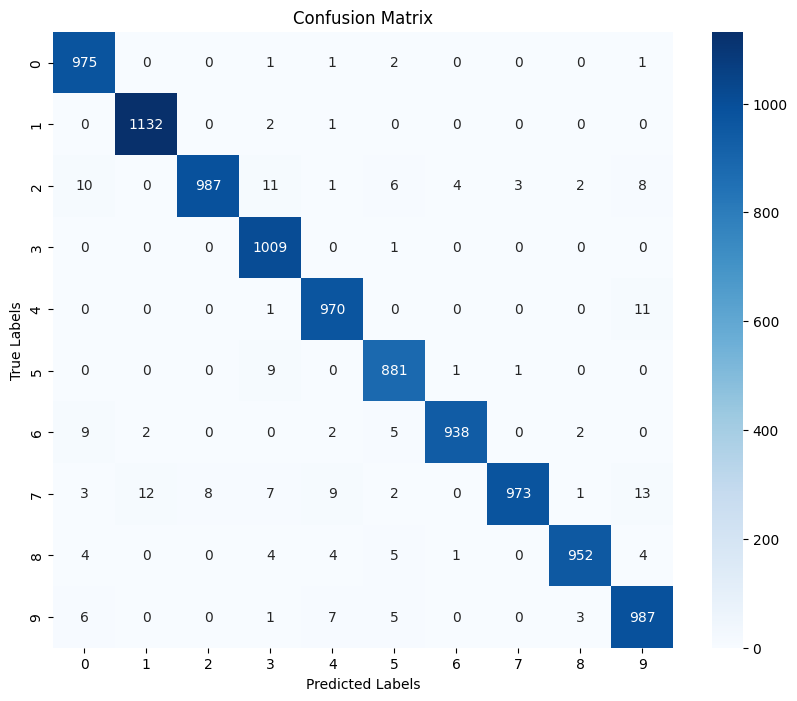

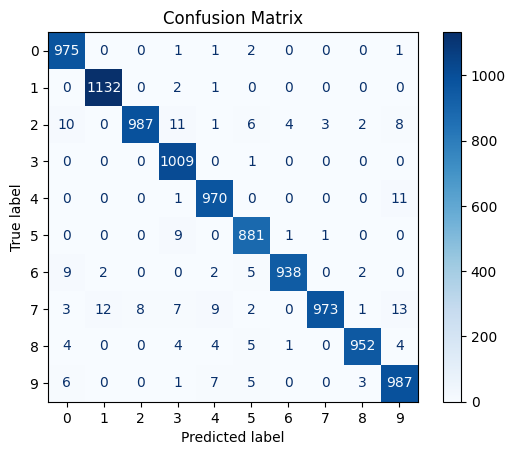

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Alternatively, using sklearn's built-in display
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

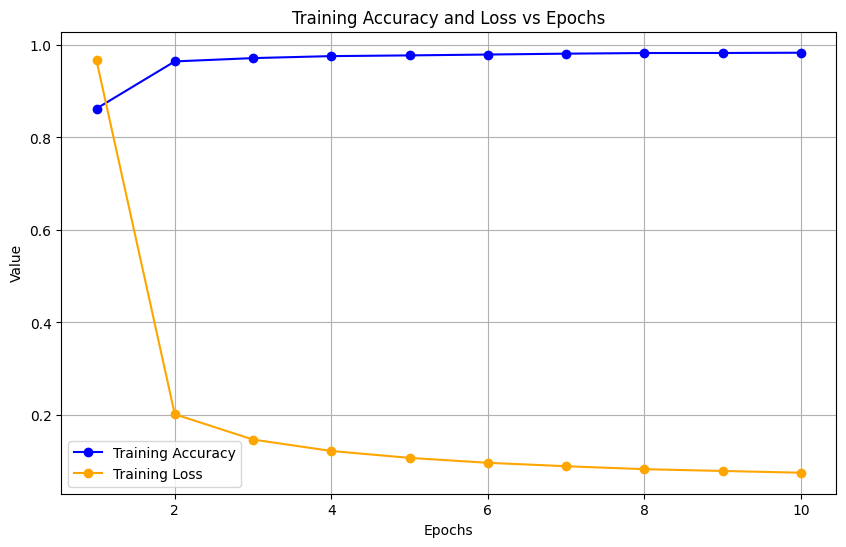

In [ ]:
# loss and accuracy vs epoch
import matplotlib.pyplot as plt

# Extract accuracy and loss from the history object
epochs = range(1, num_epochs + 1)
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

# Plot accuracy and loss on the same graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o', color='blue')
plt.plot(epochs, train_loss, label='Training Loss', marker='o', color='orange')

# Add titles, labels, and legend
plt.title('Training Accuracy and Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# get the accuracy percentage

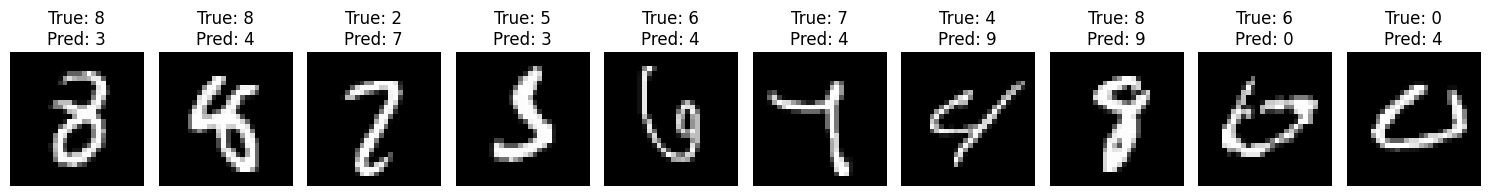

In [ ]:
# misclassified examples
import numpy as np
import matplotlib.pyplot as plt

# Identify misclassified examples
misclassified_idx = np.where(y_test != y_pred_classes)[0]

# Select a subset of misclassified examples to display
num_examples = 10  # Adjust the number as needed
misclassified_samples = misclassified_idx[:num_examples]

# Plot misclassified examples
plt.figure(figsize=(15, 5))

for i, idx in enumerate(misclassified_samples):
    plt.subplot(1, num_examples, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Normalize the data
df_train.iloc[:, :-1] = df_train.iloc[:, :-1] / 255
df_test.iloc[:, :-1] = df_test.iloc[:, :-1] / 255

# Split into features and labels
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

# Initialize and fit the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, verbose=1)

rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Print accuracy and classification report
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   30.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


Accuracy: 0.9705
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



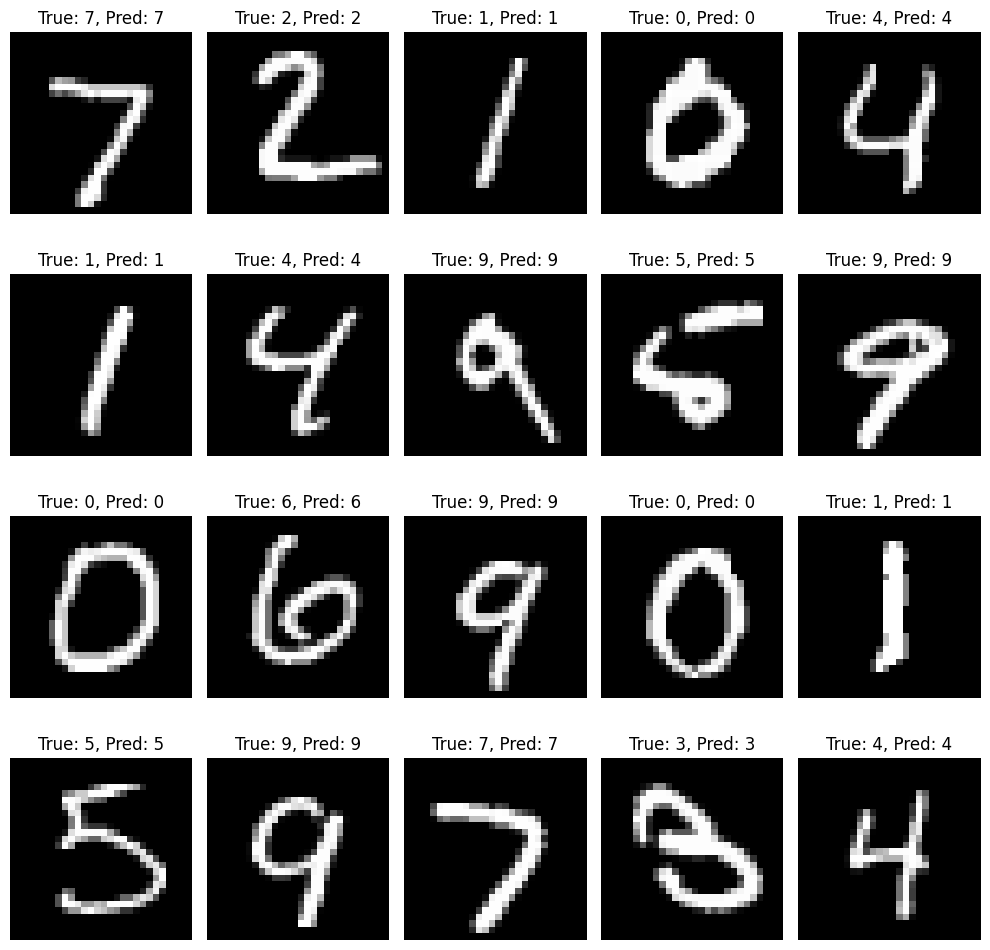

In [ ]:
#visualizations for random forest
def plot_first_predictions(images, true_labels, predicted_labels):
    plt.figure(figsize=(10, 10))
    for i in range(20):
        plt.subplot(4, 5, i + 1)
        plt.imshow(images.iloc[i].values.reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_labels.iloc[i]}, Pred: {predicted_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_first_predictions(X_test, y_test, y_pred)


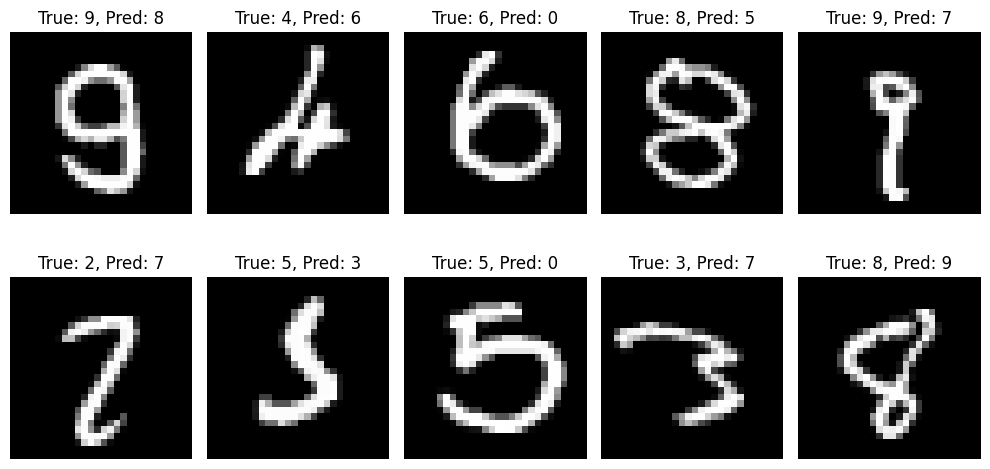

In [ ]:
#misclassified examples
import matplotlib.pyplot as plt
import numpy as np

# Identify misclassified indices
misclassified_idx = np.where(y_test != y_pred)[0]

# Plot the first 20 misclassified examples
def plot_misclassified(images, true_labels, predicted_labels, misclassified_indices):
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(misclassified_indices[:10]):
        plt.subplot(4, 5, i + 1)
        plt.imshow(images.iloc[idx].values.reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_labels.iloc[idx]}, Pred: {predicted_labels[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_misclassified(X_test, y_test, y_pred, misclassified_idx)


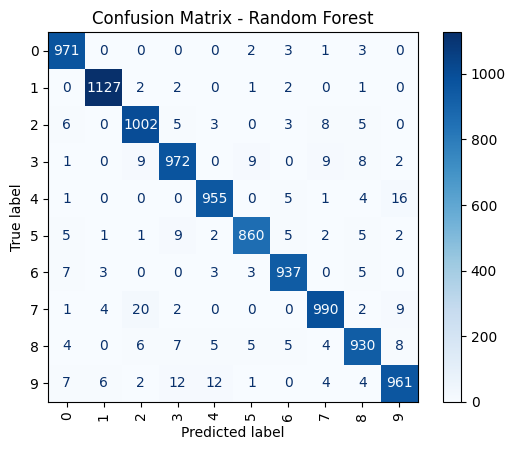

In [ ]:
#confusion matrix for random forest
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix - Random Forest")
plt.show()


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s


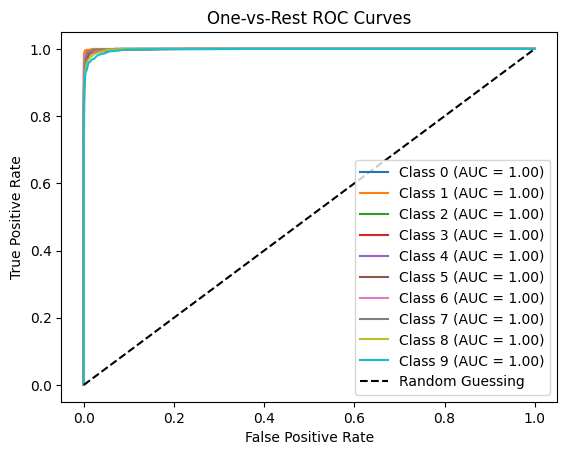

In [ ]:
# ROC CURVES
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multiclass (needed for ROC curve)
y_test_bin = label_binarize(y_test, classes=list(range(10)))  # Assuming classes 0-9
y_pred_prob = rf_clf.predict_proba(X_test)

for i in range(10):  # Loop through each class
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest ROC Curves')
plt.legend(loc='lower right')
plt.show()


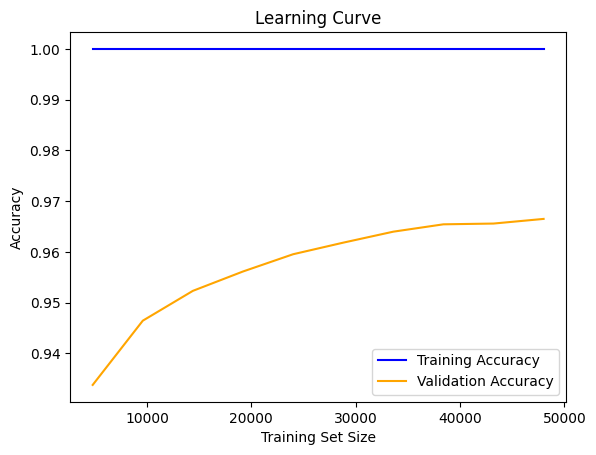

In [ ]:
#learning curve graph
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    rf_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='orange')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()
